In [33]:
from fastai.basics import *
from matplotlib import animation
%matplotlib inline

In [11]:
n = 100

x = torch.ones(n, 2)
x[:,0].uniform_(-1, 1)
x[:5]

tensor([[ 0.2535,  1.0000],
        [ 0.5153,  1.0000],
        [-0.1915,  1.0000],
        [-0.9873,  1.0000],
        [-0.5734,  1.0000]])

In [12]:
a = tensor(3.,2); a

tensor([3., 2.])

In [16]:
y = x@a + torch.rand(n)

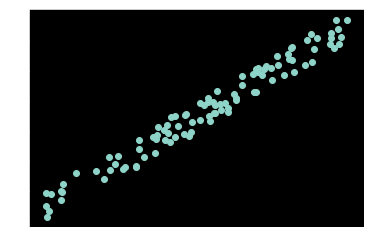

In [17]:
plt.scatter(x[:,0], y)

In [18]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [19]:
a = tensor(-1., 1.)

In [20]:
y_hat = x@a
mse(y_hat, y)

tensor(7.8193)

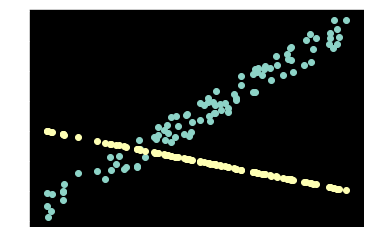

In [23]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

In [24]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [28]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [29]:
lr= 1e-1
for t in range(100): update()

tensor(7.8193, grad_fn=<MeanBackward0>)
tensor(1.2753, grad_fn=<MeanBackward0>)
tensor(0.4577, grad_fn=<MeanBackward0>)
tensor(0.2063, grad_fn=<MeanBackward0>)
tensor(0.1270, grad_fn=<MeanBackward0>)
tensor(0.1020, grad_fn=<MeanBackward0>)
tensor(0.0941, grad_fn=<MeanBackward0>)
tensor(0.0916, grad_fn=<MeanBackward0>)
tensor(0.0908, grad_fn=<MeanBackward0>)
tensor(0.0906, grad_fn=<MeanBackward0>)


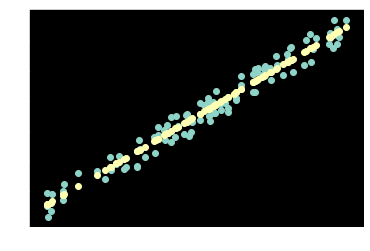

In [31]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

In [34]:
a = nn.Parameter(tensor(-1., 1.))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line, 

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)